In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
df = pd.read_csv("Iris.csv")
df = df.sample(n=100, random_state=42).reset_index(drop=True)



In [33]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,74,6.1,2.8,4.7,1.2,Iris-versicolor
1,19,5.7,3.8,1.7,0.3,Iris-setosa
2,119,7.7,2.6,6.9,2.3,Iris-virginica
3,79,6.0,2.9,4.5,1.5,Iris-versicolor
4,77,6.8,2.8,4.8,1.4,Iris-versicolor


In [34]:
print(df)

     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0    74            6.1           2.8            4.7           1.2   
1    19            5.7           3.8            1.7           0.3   
2   119            7.7           2.6            6.9           2.3   
3    79            6.0           2.9            4.5           1.5   
4    77            6.8           2.8            4.8           1.4   
..  ...            ...           ...            ...           ...   
95   90            5.5           2.5            4.0           1.3   
96    9            4.4           2.9            1.4           0.2   
97   14            4.3           3.0            1.1           0.1   
98  120            6.0           2.2            5.0           1.5   
99  126            7.2           3.2            6.0           1.8   

            Species  
0   Iris-versicolor  
1       Iris-setosa  
2    Iris-virginica  
3   Iris-versicolor  
4   Iris-versicolor  
..              ...  
95  Iris-versicol

In [35]:
X = df.drop(["Id", "Species"], axis=1)
y = df["Species"]
print(X)
print(y)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0             6.1           2.8            4.7           1.2
1             5.7           3.8            1.7           0.3
2             7.7           2.6            6.9           2.3
3             6.0           2.9            4.5           1.5
4             6.8           2.8            4.8           1.4
..            ...           ...            ...           ...
95            5.5           2.5            4.0           1.3
96            4.4           2.9            1.4           0.2
97            4.3           3.0            1.1           0.1
98            6.0           2.2            5.0           1.5
99            7.2           3.2            6.0           1.8

[100 rows x 4 columns]
0     Iris-versicolor
1         Iris-setosa
2      Iris-virginica
3     Iris-versicolor
4     Iris-versicolor
           ...       
95    Iris-versicolor
96        Iris-setosa
97        Iris-setosa
98     Iris-virginica
99     Iris-virginica
Na

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[ 2.41192237e-03 -8.08237373e-01  2.59203808e-01 -1.86446700e-01]
 [-9.62357024e-01  9.20612623e-01 -1.13436505e+00 -7.07975930e-01]
 [ 1.08777699e+00 -1.24044987e+00  1.20683063e+00  8.56611760e-01]
 [ 1.08777699e+00  5.61876249e-02  5.93660334e-01  4.65464838e-01]
 [ 4.84796396e-01 -3.76024874e-01  3.70689316e-01  2.04700223e-01]
 [ 6.05392514e-01  4.88400124e-01  5.93660334e-01  5.95847145e-01]
 [ 2.41192237e-03 -8.08237373e-01  8.16631351e-01  9.86994068e-01]
 [-1.68593373e+00 -3.76024874e-01 -1.24585056e+00 -1.22950516e+00]
 [ 2.41192237e-03 -8.08237373e-01  1.47718299e-01  7.43179153e-02]
 [ 2.43604159e-01 -1.59918625e-01  6.49403088e-01  8.56611760e-01]
 [-1.20354926e+00 -1.59918625e-01 -1.24585056e+00 -1.35988747e+00]
 [ 7.25988632e-01  5.61876249e-02  1.03960237e+00  8.56611760e-01]
 [-1.08295314e+00  5.61876249e-02 -1.19010781e+00 -1.35988747e+00]
 [-1.20354926e+00 -1.59918625e-01 -1.24585056e+00 -1.09912285e+00]
 [ 3.64200277e-01 -1.02434362e+00  1.09534512e+00  3.35082530e

In [39]:
np.random.seed(42)
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
weights = np.random.randn(input_dim, output_dim)
bias = np.random.randn(output_dim)
print("input_dim:",input_dim)
print("output_dim:",output_dim)
print("weights:",weights)
print("bias:",bias)

input_dim: 4
output_dim: 3
weights: [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]]
bias: [ 0.24196227 -1.91328024 -1.72491783]


In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
manual_output = sigmoid(np.dot(X_test, weights) + bias)

In [22]:
print("manual_output:",manual_output)

manual_output: [[0.11505727 0.1937278  0.16332173]
 [0.19645886 0.08326472 0.20946486]
 [0.52544428 0.17648241 0.08404288]
 [0.09985266 0.19649842 0.17554534]
 [0.38164598 0.07535209 0.22772628]
 [0.6555292  0.0681234  0.17959659]
 [0.18541631 0.08573943 0.1780742 ]
 [0.797832   0.17228363 0.1233735 ]
 [0.95134226 0.12076646 0.10488088]
 [0.6221938  0.19720884 0.15926459]
 [0.53841016 0.18495752 0.12083694]
 [0.15045118 0.07329514 0.15914319]
 [0.69790235 0.17435932 0.08492967]
 [0.14914057 0.09862367 0.17304174]
 [0.06569371 0.147782   0.14339271]
 [0.75908928 0.16817538 0.22018911]
 [0.98069581 0.11014105 0.06063494]
 [0.11388179 0.19613149 0.14717845]
 [0.22149114 0.0752805  0.27100109]
 [0.89497262 0.0459869  0.18808472]]


In [23]:
model = Sequential([
    Dense(output_dim, input_dim=input_dim, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=0)
tf_output = model.predict(X_test)

D:\folder desktop\New folder (2)\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


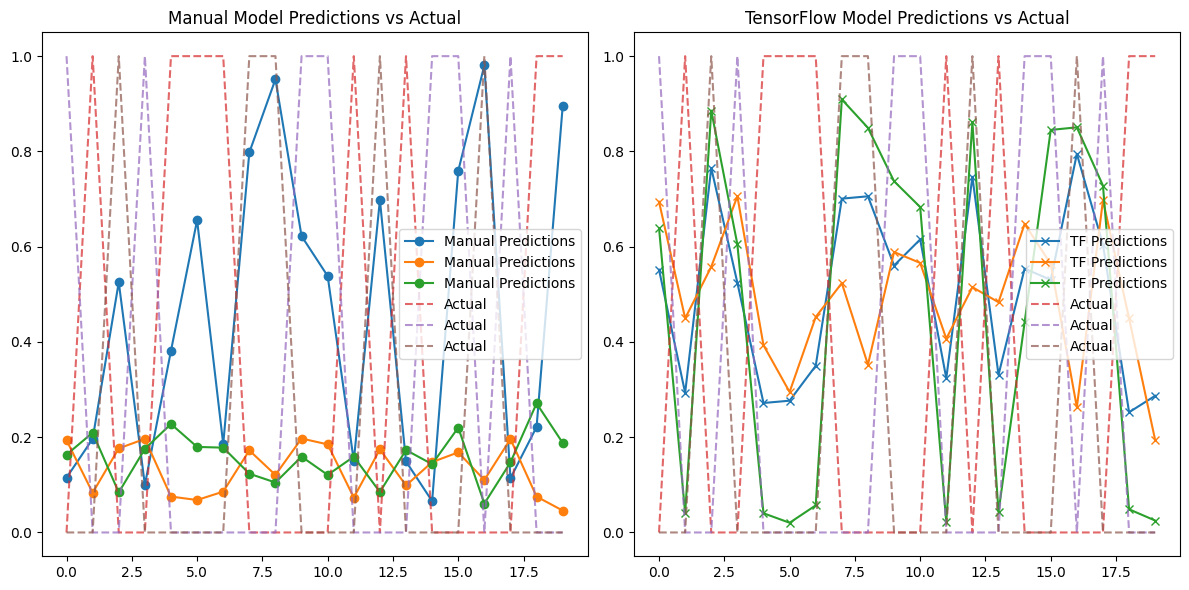

In [25]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(manual_output, label='Manual Predictions', marker='o')
plt.plot(y_test, label='Actual', linestyle='--', alpha=0.7)
plt.title("Manual Model Predictions vs Actual")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tf_output, label='TF Predictions', marker='x')
plt.plot(y_test, label='Actual', linestyle='--', alpha=0.7)
plt.title("TensorFlow Model Predictions vs Actual")
plt.legend()

plt.tight_layout()
plt.show()

In [28]:

actual_classes = encoder.inverse_transform(y_test).ravel()
manual_classes = encoder.inverse_transform((manual_output == manual_output.max(axis=1, keepdims=True)).astype(int)).ravel()
tf_classes = encoder.inverse_transform((tf_output == tf_output.max(axis=1, keepdims=True)).astype(int)).ravel()
print("tf_classes:",tf_classes)
print("manual_classes:",manual_classes)

tf_classes: ['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa']
manual_classes: ['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa']


In [29]:
prediction_df = pd.DataFrame({
    "Actual_Class": actual_classes,
    "Manual_Predicted_Class": manual_classes,
    "TF_Predicted_Class": tf_classes
})

print("\n🔹 Predicted Values Table:")
print(prediction_df.head(10))


🔹 Predicted Values Table:
      Actual_Class Manual_Predicted_Class TF_Predicted_Class
0  Iris-versicolor        Iris-versicolor    Iris-versicolor
1      Iris-setosa         Iris-virginica    Iris-versicolor
2   Iris-virginica            Iris-setosa     Iris-virginica
3  Iris-versicolor        Iris-versicolor    Iris-versicolor
4      Iris-setosa            Iris-setosa    Iris-versicolor
5      Iris-setosa            Iris-setosa    Iris-versicolor
6      Iris-setosa            Iris-setosa    Iris-versicolor
7   Iris-virginica            Iris-setosa     Iris-virginica
8   Iris-virginica            Iris-setosa     Iris-virginica
9  Iris-versicolor            Iris-setosa     Iris-virginica


In [30]:

manual_accuracy = np.mean(
    np.argmax(manual_output, axis=1) == np.argmax(y_test, axis=1)
)
tf_accuracy = np.mean(
    np.argmax(tf_output, axis=1) == np.argmax(y_test, axis=1)
)

print(f"\nManual Accuracy: {manual_accuracy:.2f}")
print(f"TensorFlow Model Accuracy: {tf_accuracy:.2f}")
print("\nNote: TensorFlow model typically outperforms manual model due to better weight optimization during training.")



Manual Accuracy: 0.40
TensorFlow Model Accuracy: 0.45

Note: TensorFlow model typically outperforms manual model due to better weight optimization during training.
